In [40]:
import ast
import numpy as np
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
from sklearn import linear_model
plt.rcParams["figure.figsize"] = (16,8)
import math
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from collections import Counter, OrderedDict

sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":30,"axes.titlesize":20,"axes.labelsize":20},style="white", context='paper')

In [21]:
#ast.literal_eval(open('ecoli-9.sig').read())[0]['signatures'][0]['abundances']

In [28]:
from glob import glob
file_list = glob('*.sig')

In [29]:
def map_sig_value(filename):
    fil = ast.literal_eval(open('ecoli-9.sig').read())[0]['signatures'][0]
    dic =  dict(zip(fil['mins'], fil['abundances'])) 
    return dic
    

In [30]:
vec = DictVectorizer()
signatures = [map_sig_value(x) for x in file_list]
sparse = vec.fit_transform(signatures)


In [31]:
sparse.

<50x2535 sparse matrix of type '<class 'numpy.float64'>'
	with 126750 stored elements in Compressed Sparse Row format>

In [39]:
import sklearn.feature_extraction.text
tfidf = sklearn.feature_extraction.text.TfidfTransformer(norm='l1').fit(sparse)
sparsefiidf = tfidf.transform(sparse)




mapper = umap.UMAP(metric='cosine', random_state=42).fit(sparse)
mappertfidf =umap.UMAP(metric='cosine', random_state=42).fit(sparse)

In [36]:
import umap.plot
umap.plot.points(mapper, labels=file_list)

ModuleNotFoundError: No module named 'umap.plot'

In [41]:
sparse_u = umap.UMAP(random_state=42).fit_transform(sparse)

In [42]:
sparse_tfidf_u = umap.UMAP(random_state=42).fit_transform(sparsefiidf)

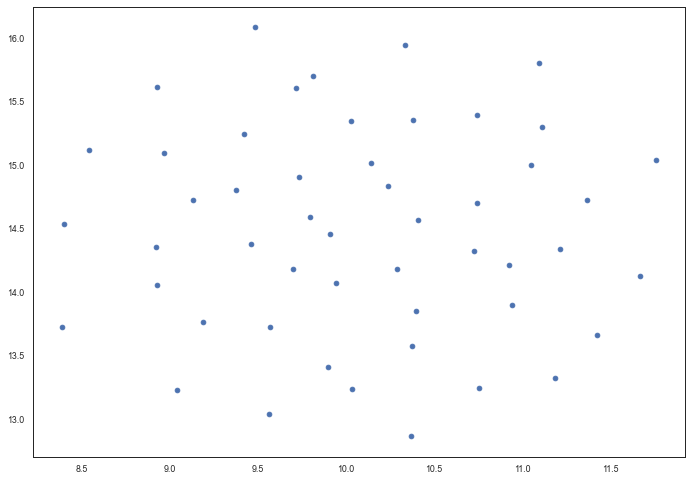

In [54]:
plt.scatter(sparse_u[:,0], sparse_u[:,1])

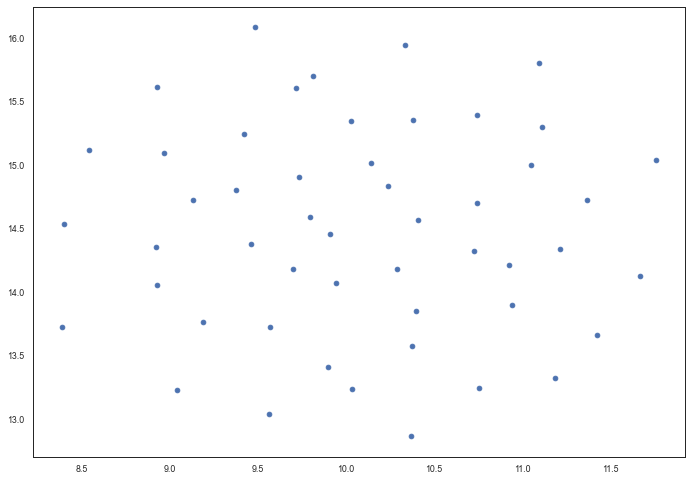

In [56]:
plt.scatter(sparse_tfidf_u[:,0], sparse_tfidf_u[:,1])